In [244]:
import torch.nn as nn
import torchvision
from matplotlib import pyplot as plt
import numpy as np

In [245]:
class AlexNet(nn.Module):
  def __init__(self,num_classes=100):
    super().__init__()
    self.features = nn.Sequential(
      nn.AdaptiveAvgPool2d((256,256)),
      nn.Conv2d(1,64,kernel_size=11,stride=4,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),

      nn.Conv2d(64,192,kernel_size=5,stride=1,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
      
      nn.Conv2d(192,384,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace=True),

      nn.Conv2d(384,256,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace = True),
           
      nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1),
      nn.ReLU(inplace = True),
      nn.MaxPool2d(kernel_size = 3, stride = 2)

    );

    self.classifier = nn.Sequential(
        nn.AdaptiveAvgPool2d((6,6)),
        nn.Flatten(),
        nn.Dropout(0.5),
        nn.Linear(256*6*6,4096),
        nn.ReLU(inplace = True),
        nn.Dropout(p = 0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace = True),
        nn.Linear(4096, num_classes)
    )
  def forward(self,x):
    x = self.features(x);
    x = self.classifier(x)
    return x

In [246]:
class AlexNet(nn.Module):
  def __init__(self,num_classes=100):
    super().__init__()
    self.features = nn.Sequential(
      nn.AdaptiveAvgPool2d((32,32)),
      nn.Conv2d(1,64,kernel_size=11,stride=4,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),

      nn.Conv2d(64,256,kernel_size=5,stride=1,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
     
      

    );

    self.classifier = nn.Sequential(
        nn.AdaptiveAvgPool2d((6,6)),
        nn.Flatten(),
        nn.Dropout(0.5),
        nn.Linear(256*6*6,512),
        nn.ReLU(inplace = True),
        nn.Dropout(p = 0.1),
        nn.Linear(512,512),
        nn.ReLU(inplace = True),
        nn.Dropout(p = 0.1),
      
        nn.Linear(512, num_classes)
    )
  def forward(self,x):
    x = self.features(x);
    x = self.classifier(x)
    return x

In [247]:

def alexnet(pretrained = False, **kwargs):
    model = AlexNet(**kwargs)
    if pretrained:
        raise Exception("pretrained model is not implemented yet")

    return model

In [248]:
### Loading Datasets

In [249]:
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

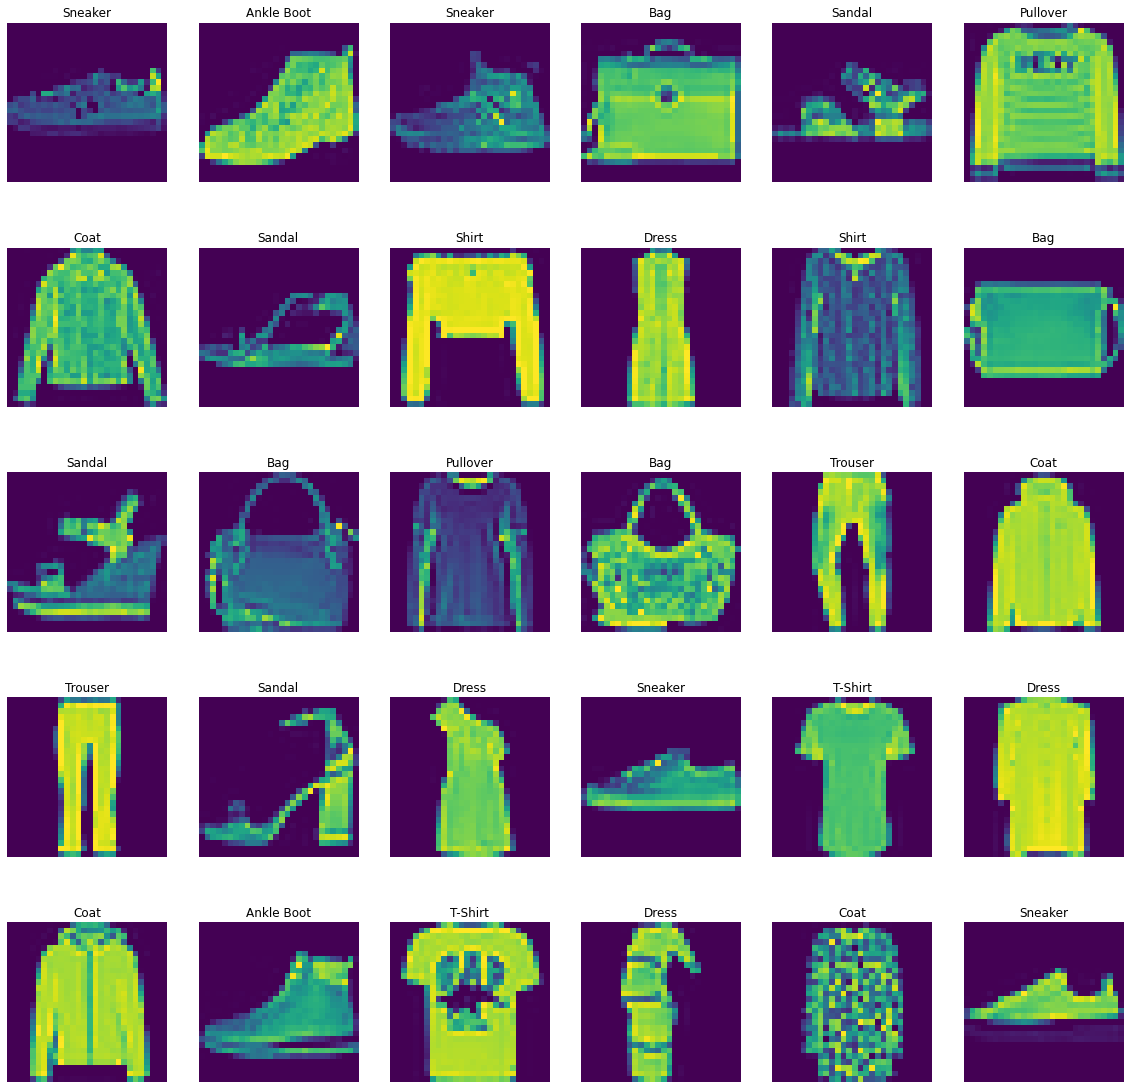

In [250]:
random_id = np.random.randint(len(training_data),size=(30))
plt.figure(figsize=(20,20))
for i,id in enumerate(random_id):
  plt.subplot(5,6,i+1)
  image = training_data[id][0].squeeze()
  label = labels_map[training_data[id][1]]
  plt.title(label)
  plt.axis('off')
  plt.imshow(image)

In [251]:
ds = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=torchvision.transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
trainloader = torch.utils.data.DataLoader(ds, batch_size=300,
                                          shuffle=True, num_workers=2)

tds = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=torchvision.transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
testloader = torch.utils.data.DataLoader(tds, 
                                          shuffle=True,batch_size=100, num_workers=2)

In [252]:
mynet = alexnet(num_classes=10)

In [253]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mynet.parameters(),lr=0.0006,momentum=0.45)

In [257]:
running_loss = 0
mynet.train()
for epoch in range(2):
  for i,data in enumerate(trainloader,0):
    inputs,labels = data

    optimizer.zero_grad()

    outputs = mynet(inputs)
    loss = criterion(outputs,torch.argmax(labels,axis=1))
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 10 == 9:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

[1,    10] loss: 0.004
[1,    20] loss: 0.004
[1,    30] loss: 0.004
[1,    40] loss: 0.004
[1,    50] loss: 0.003
[1,    60] loss: 0.004
[1,    70] loss: 0.003
[1,    80] loss: 0.003
[1,    90] loss: 0.003
[1,   100] loss: 0.004
[1,   110] loss: 0.003
[1,   120] loss: 0.003
[1,   130] loss: 0.003
[1,   140] loss: 0.004
[1,   150] loss: 0.003
[1,   160] loss: 0.003
[1,   170] loss: 0.004
[1,   180] loss: 0.004
[1,   190] loss: 0.004
[1,   200] loss: 0.003
[1,   210] loss: 0.003
[1,   220] loss: 0.003
[1,   230] loss: 0.003
[1,   240] loss: 0.003
[1,   250] loss: 0.003
[1,   260] loss: 0.004
[1,   270] loss: 0.003
[1,   280] loss: 0.003
[1,   290] loss: 0.003
[1,   300] loss: 0.003
[1,   310] loss: 0.004
[1,   320] loss: 0.003
[1,   330] loss: 0.003
[1,   340] loss: 0.003
[1,   350] loss: 0.003
[1,   360] loss: 0.003
[1,   370] loss: 0.003
[1,   380] loss: 0.003
[1,   390] loss: 0.003
[1,   400] loss: 0.003
[1,   410] loss: 0.003
[1,   420] loss: 0.003
[1,   430] loss: 0.003
[1,   440] 

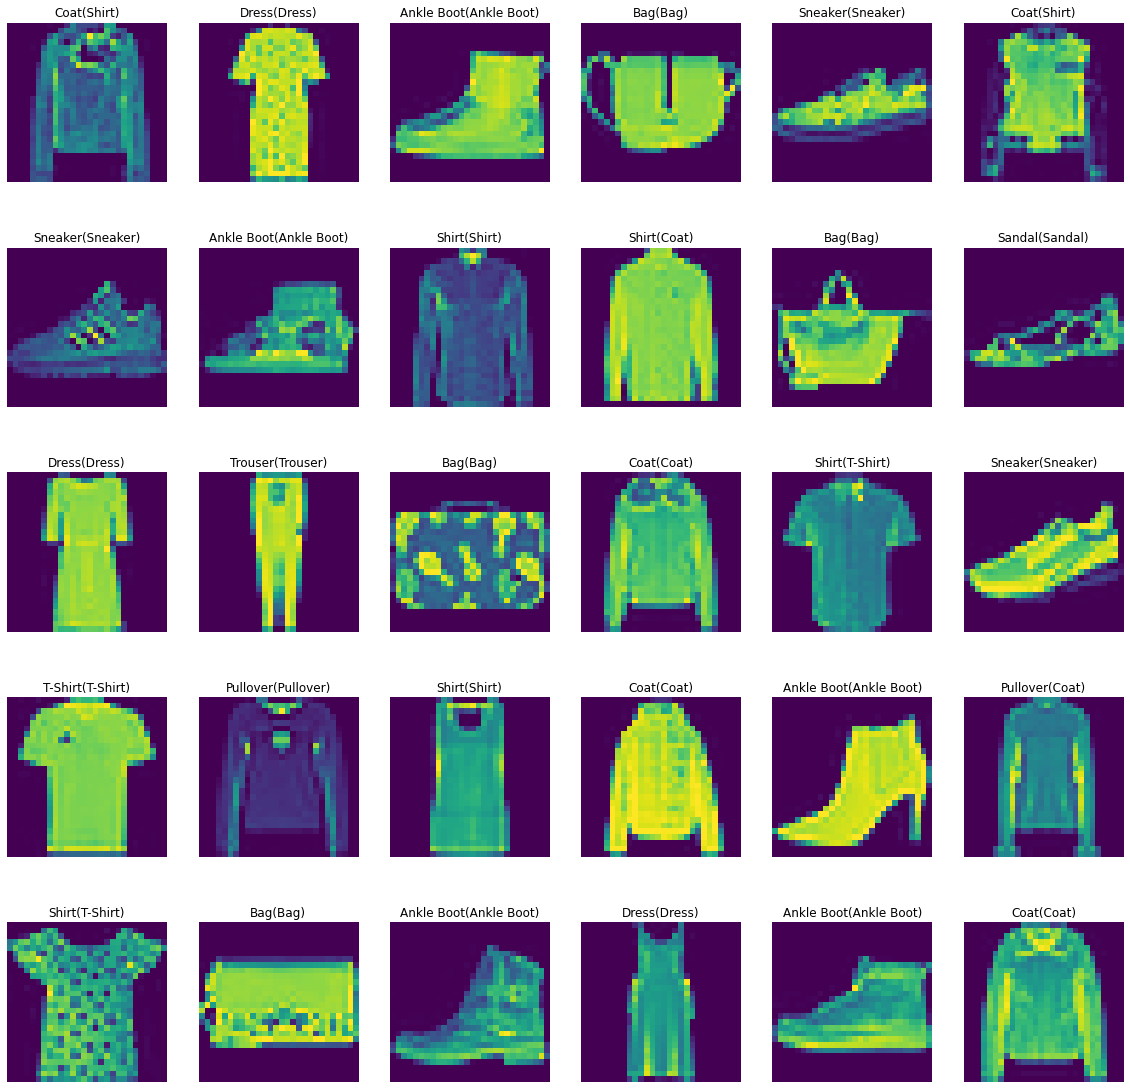

In [258]:
random_id = np.random.randint(len(training_data),size=(30))
plt.figure(figsize=(20,20),facecolor='white')
for i,id in enumerate(random_id):
  plt.subplot(5,6,i+1)
  image = training_data[id][0].squeeze()
  olabel = np.argmax(mynet(image.unsqueeze(0).unsqueeze(0)).detach().numpy())
  olabel = labels_map[olabel]
  label = labels_map[training_data[id][1]] + f"({olabel})"
  plt.title(label)
  plt.axis('off')
  plt.imshow(image)

In [260]:
total = 0
correct = 0
with torch.no_grad():
    mynet.eval()
    for data in trainloader:

        inputs,labels = data
        outputs = mynet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, expected = torch.max(labels,1)
        total += labels.size(0)
       
        correct += (predicted == expected).sum().item()
        print(correct/total * 100.0)

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

77.0
75.5
76.66666666666667
76.5
77.2
77.5
78.14285714285715
78.0
78.33333333333333
77.8
77.72727272727272
78.08333333333334
78.38461538461539
78.5
79.13333333333334
79.125
78.88235294117646
78.88888888888889
78.89473684210526
79.3
79.71428571428572
79.68181818181819
79.69565217391305
79.70833333333334
79.47999999999999
79.53846153846153
79.55555555555556
79.25
79.06896551724138
79.2
79.03225806451613
79.09375
79.06060606060606
79.11764705882352
79.11428571428571
79.13888888888889
79.08108108108108
79.1842105263158
79.43589743589745
79.5
79.3658536585366
79.33333333333333
79.34883720930233
79.27272727272727
79.3111111111111
79.30434782608695
79.27659574468086
79.25
79.42857142857143
79.5
79.3921568627451
79.5576923076923
79.32075471698113
79.35185185185185
79.23636363636363
79.28571428571428
79.19298245614034
79.20689655172414
79.28813559322035
79.26666666666667
79.26229508196721
79.3225806451613
79.25396825396825
79.34375
79.41538461538461
79.51515151515152
79.52238805970148
79.441176

In [209]:
_, pr = torch.max(outputs.data,1)

In [210]:
pr

tensor([0, 0, 1, 5, 4, 2, 2, 8, 3, 5, 4, 4, 3, 0, 3, 5, 7, 9, 0, 4, 7, 1, 5, 9,
        1, 4, 5, 3, 7, 5, 2, 3, 1, 5, 7, 8, 2, 2, 2, 0, 9, 1, 9, 1, 8, 1, 4, 9,
        8, 2, 7, 5, 4, 5, 0, 0, 0, 3, 9, 1, 8, 2, 2, 2, 4, 5, 7, 2, 7, 0, 0, 3,
        3, 3, 1, 3, 3, 1, 4, 9, 5, 3, 1, 2, 0, 9, 2, 8, 8, 7, 2, 9, 0, 0, 3, 5,
        5, 0, 7, 1])